# Case Study - Regression

This data is a **regression problem**, trying to predict life expectancy.

The followings describe the features.

- **Country**
- **Year**
- **Status**: Developed or Developing status
- **Life expectancy**: Life Expectancy in age
- **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **Infant deaths**: Number of Infant Deaths per 1000 population
- **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **Percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- **Measles**: - number of reported cases per 1000 population
- **BMI** Average Body Mass Index of entire population
- **under-five deaths**: Number of under-five deaths per 1000 population
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
- **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- **HIV/AIDS**: Deaths per 1000 live births HIV/AIDS (0-4 years)
- **GDP**: Gross Domestic Product per capita (in USD)
- **Population**: Population of the country
- **thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- **thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)
- **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling**: Number of years of Schooling(years)

## Importing libraries

In [439]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [440]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

## 1. Load data

In [441]:
df = pd.read_csv('data/car_price_dataset.csv')

In [442]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [443]:
# Check the shape of your data
df.shape

(8128, 13)

In [444]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [445]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [446]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [447]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [448]:
# rename columns
df.rename(columns = {'name':'brand', 
                     }, inplace = True)

In [449]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

<Axes: xlabel='transmission', ylabel='count'>

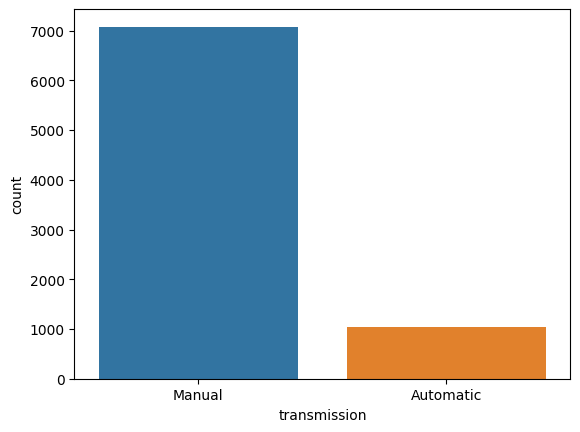

In [450]:
# Let's see how many developing and developed countries there are
sns.countplot(data = df, x = 'transmission')

#### Distribution plot

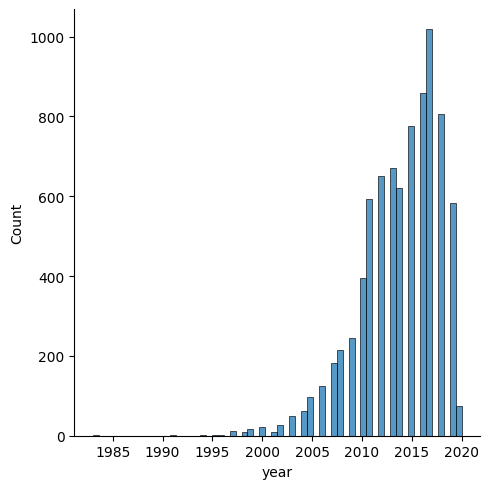

In [451]:
sns.displot(data = df, x = 'year')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Text(0.5, 0, 'year')

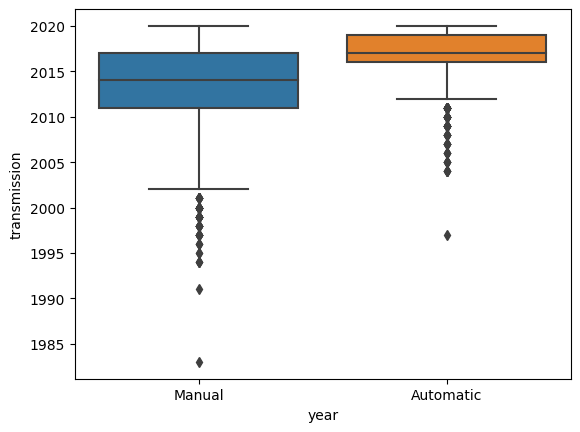

In [452]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["transmission"], y = df["year"])
plt.ylabel("transmission")
plt.xlabel("year")

#### Scatterplot

<Axes: xlabel='selling_price', ylabel='year'>

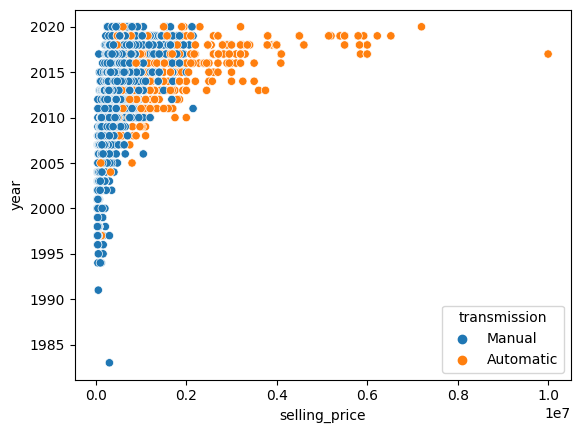

In [453]:
sns.scatterplot(x = df['selling_price'], y = df['year'], hue=df['transmission'])

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

<Axes: >

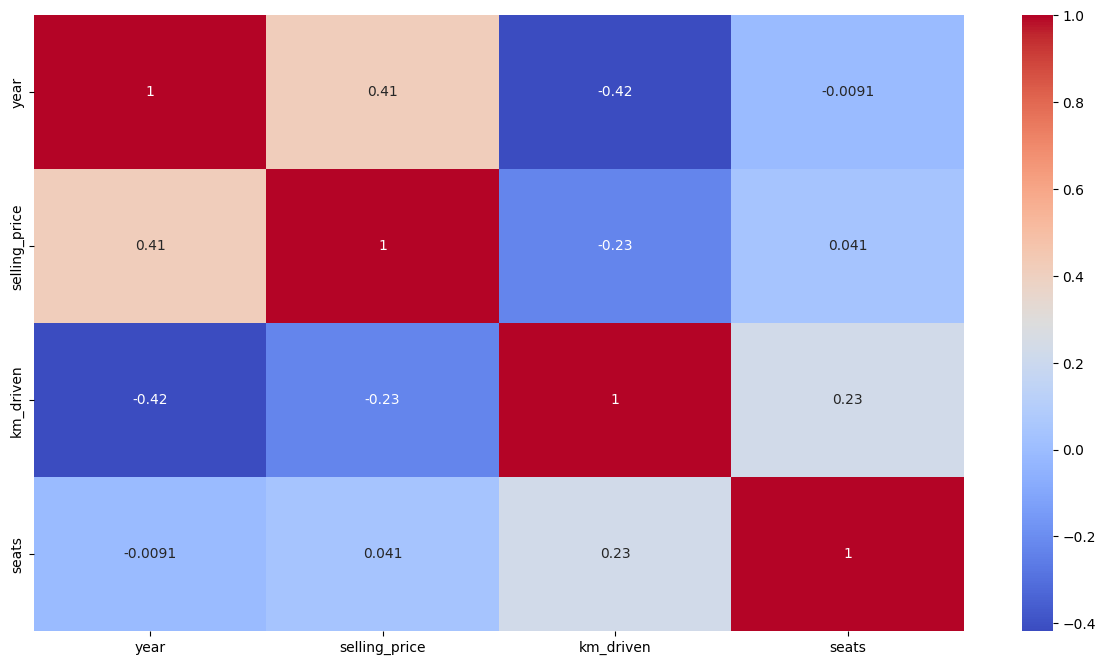

In [454]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [455]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["owner"] = le.fit_transform(df["owner"])

df["owner"].unique()

array([0, 2, 4, 1, 3])

In [456]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [457]:
# Define the mapping of values
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Apply the mapping using the replace() function
df['owner'] = df['owner'].replace(owner_mapping)

In [458]:
df.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,0,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,0,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,0,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,0,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [459]:
# Extract numeric mileage values by splitting and converting to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [460]:
# Remove "CC" and convert to float
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

In [461]:
# Remove " bhp" and convert to float, handling N/A values
df['max_power'] = df['max_power'].str.replace(' bhp', '')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce') #It should be float.

In [462]:
# Extract the first word and update the column
df['brand'] = df['brand'].apply(lambda x: x.split()[0])

In [463]:
# Drop the 'torque' feature
df = df.drop(columns=['torque'])

<Axes: >

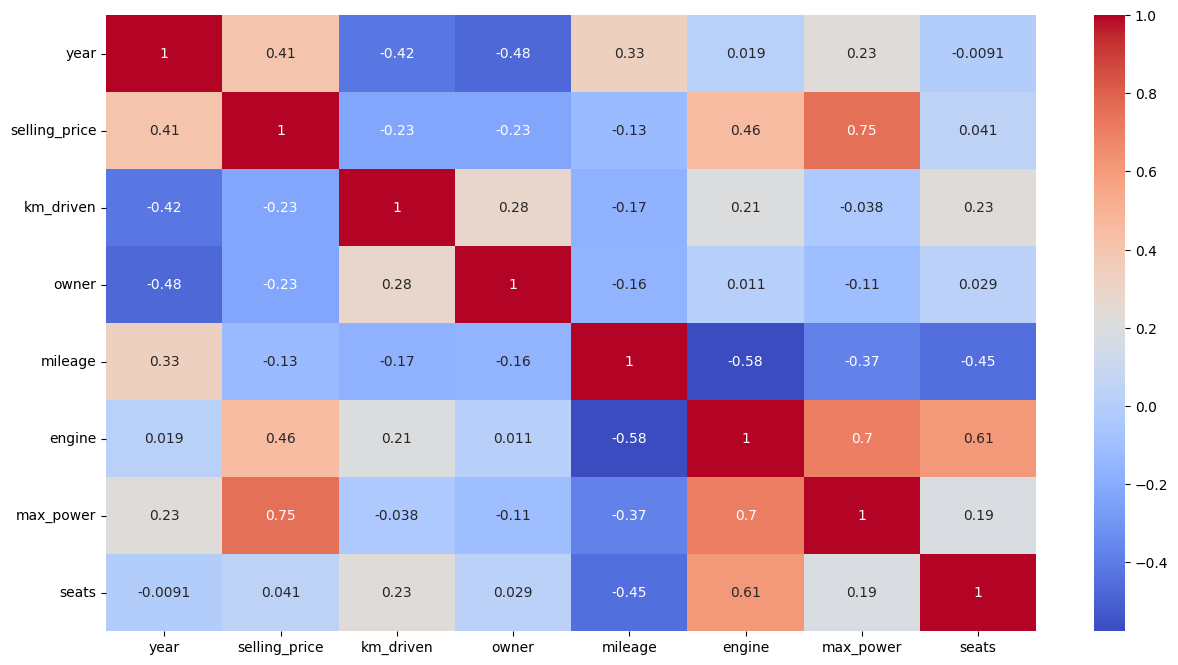

In [464]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

<Axes: xlabel='x', ylabel='y'>

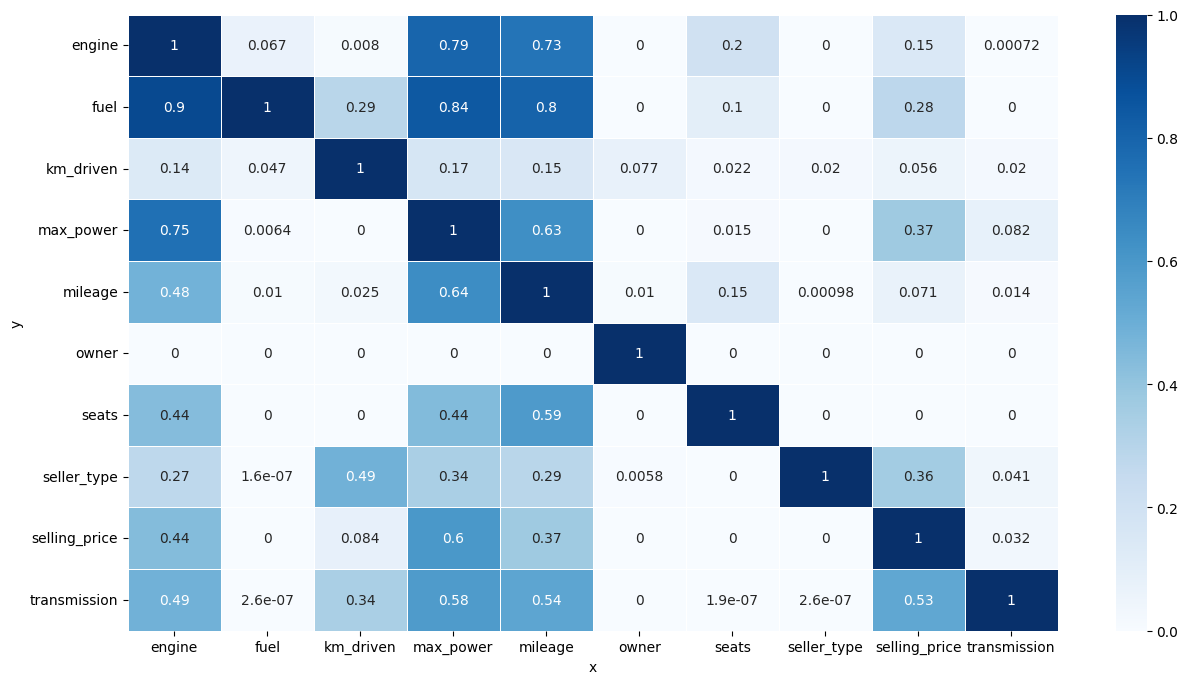

In [465]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['brand', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature Engineering

We gonna skip for this tutorial.  But we can certainly try to combine some columsn to create new features.

## 4. Feature selection

In [466]:
#x is our strong features
X = df[        ['engine', 'max_power', 'mileage']        ]

#y is simply the life expectancy col
y = df["selling_price"]

### Train test split

In [467]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #It can be 0.2-0.4 for test_size

## 5. Preprocessing

### Null values

In [468]:
#check for null values
X_train[['engine', 'max_power','mileage']].isna().sum()

engine       151
max_power    149
mileage      151
dtype: int64

In [469]:
X_test[['engine', 'max_power','mileage']].isna().sum()

engine       70
max_power    67
mileage      70
dtype: int64

In [470]:
y_train.isna().sum()

0

In [471]:
y_test.isna().sum()

0

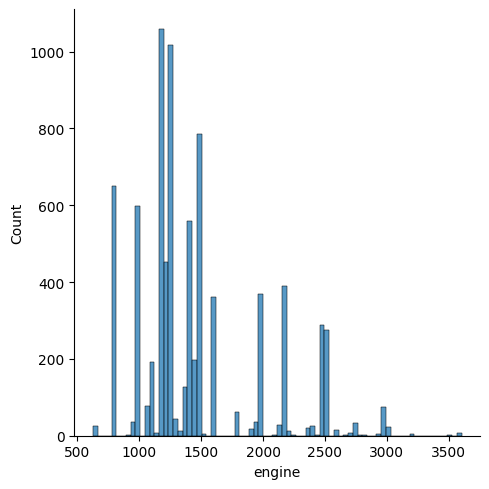

In [472]:
sns.displot(data=df, x='engine')

In [473]:
df['engine'].mean(),df['engine'].median()

(1458.625015808777, 1248.0)

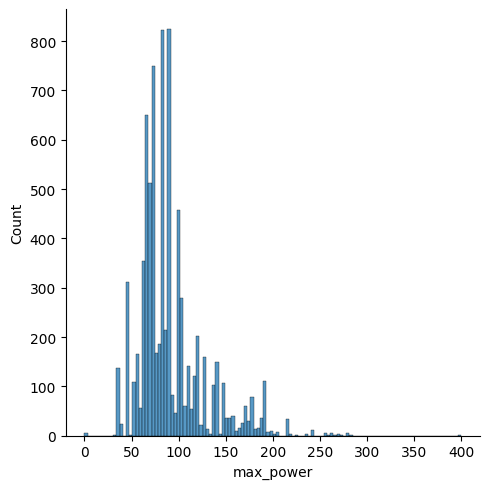

In [474]:
sns.displot(data=df, x='max_power')

In [475]:
df['max_power'].mean(),df['max_power'].median()

(91.51791898382203, 82.0)

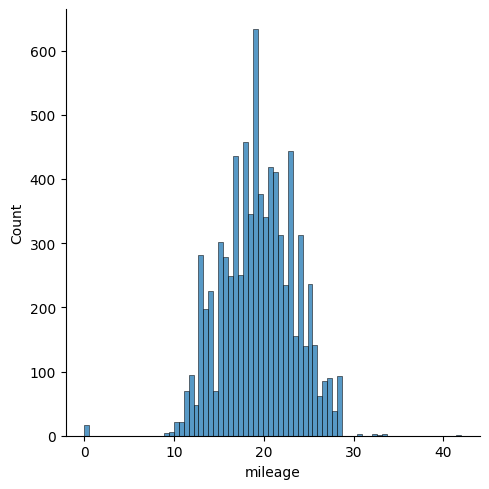

In [476]:
sns.displot(data=df, x='mileage')

In [477]:
df['mileage'].mean(),df['mileage'].median()

(19.41878335651954, 19.3)

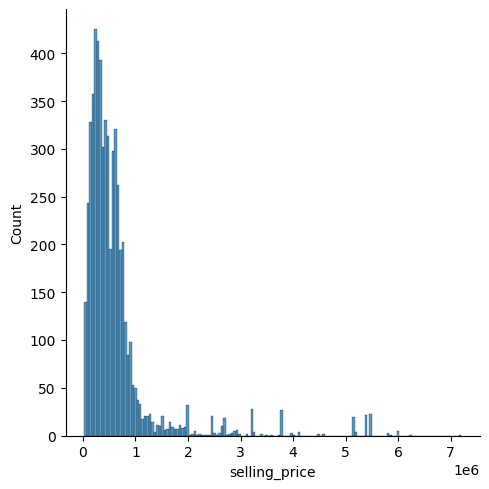

In [478]:
sns.displot(y_train)

In [479]:
df['selling_price'].mean(),df['selling_price'].median()

(638271.8077017716, 450000.0)

Mean: Use the mean to fill missing values if the data is approximately normally distributed and does not have significant outliers. The mean is sensitive to extreme values, so if your data has outliers, using the mean might result in skewed imputations.

Median: Use the median to fill missing values if your data has outliers or is skewed. The median is a robust measure of central tendency and is less affected by extreme values compared to the mean.

In [480]:
#let's fill the training set first!
# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [481]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [482]:
#same for y
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [483]:
#check again
X_train[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [484]:
X_test[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [485]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

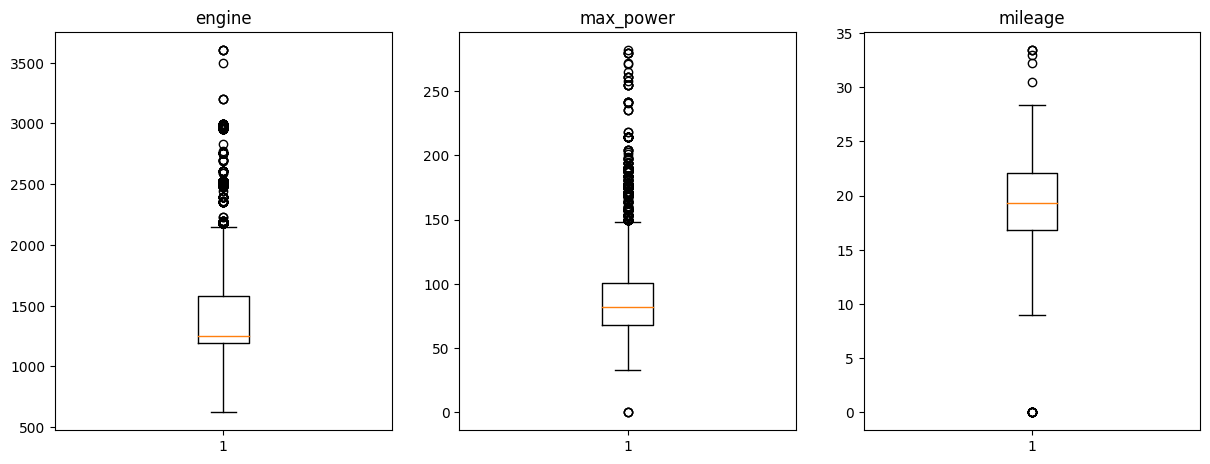

In [486]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [487]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [488]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 820
Percent of data that is outlier: 14.41%

---------------max_power---------------

Number of outliers: 421
Percent of data that is outlier: 7.4%

---------------mileage---------------

Number of outliers: 19
Percent of data that is outlier: 0.33%


### Scaling

In [489]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#why do we want to scale our data before data analysis / machine learning

#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image) We will use nomalization when mean is a bad.

In [490]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5689, 3)
Shape of X_test:  (2439, 3)
Shape of y_train:  (5689,)
Shape of y_test:  (2439,)


## 6. Modeling

Let's define some algorithms and compare them using cross-validation.

[Scikit-Learn](http://scikit-learn.org) provides quick access to a huge pool of machine learning algorithms.

Before using sklearn, there is **one thing you need to know**, i.e., the **data shape that sklearn wants**.

To apply majority of the algorithms, sklearn requires two inputs, i.e., $\mathbf{X}$ and $\mathbf{y}$.

-  $\mathbf{X}$, or the **feature matrix** *typically* has the shape of ``[n_samples, n_features]``
-  $\mathbf{y}$, or the **target/label vector** *typically* has the shape of ``[n_samples, ]`` or ``[n_samples, n_targets]`` depending whether that algorithm supports multiple labels

Note 1:  if you $\mathbf{X}$ has only 1 feature, the shape must be ``[n_samples, 1]`` NOT ``[n_samples, ]``

Note 2:  sklearn supports both numpy and pandas, as long as the shape is right.  For example, if you use pandas, $\mathbf{X}$ would be a dataframe, and $\mathbf{y}$ could be a series or dataframe.

Tips:  it's always better to look at sklearn documentation before applying any algorithm.

In [491]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  276671646572.30927
r2:  0.5983635966352815


### Much better: Cross validation + Grid search

In [ ]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [ ]:
y_train.isna().sum()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Hmm...it seems random forest do very well....how about we grid search further to find the best version of the model.

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [ ]:
grid.best_params_

In [ ]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [ ]:
best_mse  # ignore the minus because it's neg_mean_squared_error

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [ ]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

## 8. Analysis:  Feature Importance

Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.  There are several ways: algorithm, permutation, and shap.  Note that these techniques can be mostly applied to most algorithms. 

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [ ]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

In [ ]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

In [ ]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [ ]:
import pickle

# save the model to disk
filename = 'model/life-expectancy.model'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#let's try to create one silly example
df[['income', 'school', 'adult-mort', 'life-exp']].loc[1]

In [ ]:
#['income', 'school', 'adult-mort'] 
sample = np.array([[0.476, 10.000, 271.000]])

In [ ]:
predicted_life_exp = loaded_model.predict(sample)
predicted_life_exp

## Group Workshop - Check your understandings

Answer the following questions:

Instruction:  Gather in your group.  Will randomly pick groups to present.

1.  Why this dataset is a regression problem?
    - Life expectancy (which is our label) is continuous
    - It does not matter whether our features are continuous or discrete
2.  How many samples of data do we have?  How many features do we have?  How many label do we have?
    - 2938 samples | 21 features | 1 label
3.  Notice "status" is a object dtype.  What is "object" dtype?
    - Basically "string" or "mixed" type
4.  Notice "float64".  What 64 means?
    - numeric type for decimal - 64 bits - how many alternating 0 and 1s to represent a number - the higher, the more precision it can hold


5.  Create another countplot.
6.  Create another displot.
7.  Create another boxplot.
8.  Create another scatterplot.

9.  We have used "label-encoding" which turns category into 0, 1, 2, ...   Another technique is called one-hot encoding.  What's the difference, and what's the pros and cons?
    - label encoding encodes categories into numbers from 0 to k, which k is the number of categories - 1
    - label encoding unintentionally creates an order --> 3 > 2 > 1 > 0
    - one-hot encoding --> creates one column for each category
    - You have 50 categories -> 50 extra columns.....that's ugly...
10. What is `random_state` = 42"
    - you can use whatever numbers you want; it just allow you to reproduce that everytime you run the code again
    - split things into training and testing set in a reproducible way
11. How do we know whether to replace with mean or median?
    - use `sns.displot` to look at the distribution; if mean represents the majority, use mean, otherwise, maybe median
12. How many ways to scale data, and when to use them?   Try not to scale, and see whether the mse changes.  Why?
    - 2 ways - standardization (when mean is a good centrality measures)
    - normalization (when max and min are better centrality measures - e.g., signal)
    - Scaling helps the training process faster to reach convergence BUT it does not allow you to reach a better performance
13. Why we should preprocess only AFTER we split the dataset?
    - Prevent data leakage
14. Try to change to other `X` and try find the best three features which get the best mse.
    - Seems like all three features are important 
15. How much mse or $r^2$ is considered good or bad?
    - mse : [0, infty) | 0 is the best
    - $r^2$: (-infty, 1] | 1 is the best | 0 means not better than mean | - means worst than mean
16. How do I know which algorithm to use?  There are so many regression algorithms.
    - cross validation
17. We use kfold cross-validation.  Try to find other ways of cross-validation.  Hint: search inside sklearn website.
18. In cross-validation and grid search, did we touch the testing set?
    - ONLY the training set
19. Why do we need to do grid search after cross validation?
    - to find the best possible configuration of that best already algorithm
20. What is feature importance?
    - to analyze which features contribute most to the prediction
21. After I got the model, then how can I create a website/mobile application?  Explain in details. 
    - save the model | using streamlit, dash, flask | load the model | put the numbers inside the model | and called `model.predict([np.array])`